# **WordToVec Demo**



# Sample sentences :
    
# 1) Welcome to Malla Reddy
# 2) Malla Reddy has CSE stream
# 3) CSE stream in Malla Reddy is best

# Corpus :
# Welcome, to , Malla, Reddy, hass, CSE, Stream, in, is, best  - 10 D vector


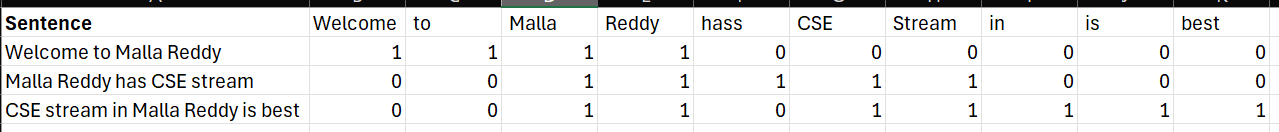



Training the Data for Word2Vec

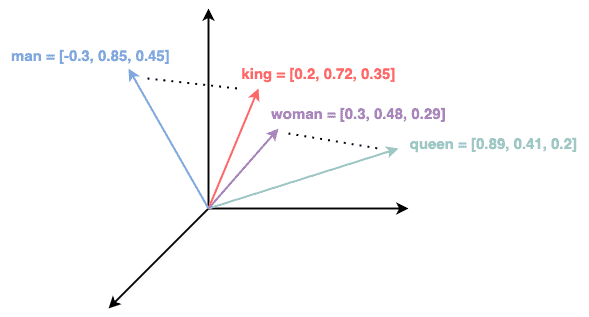

Embeddings in ndimensional space

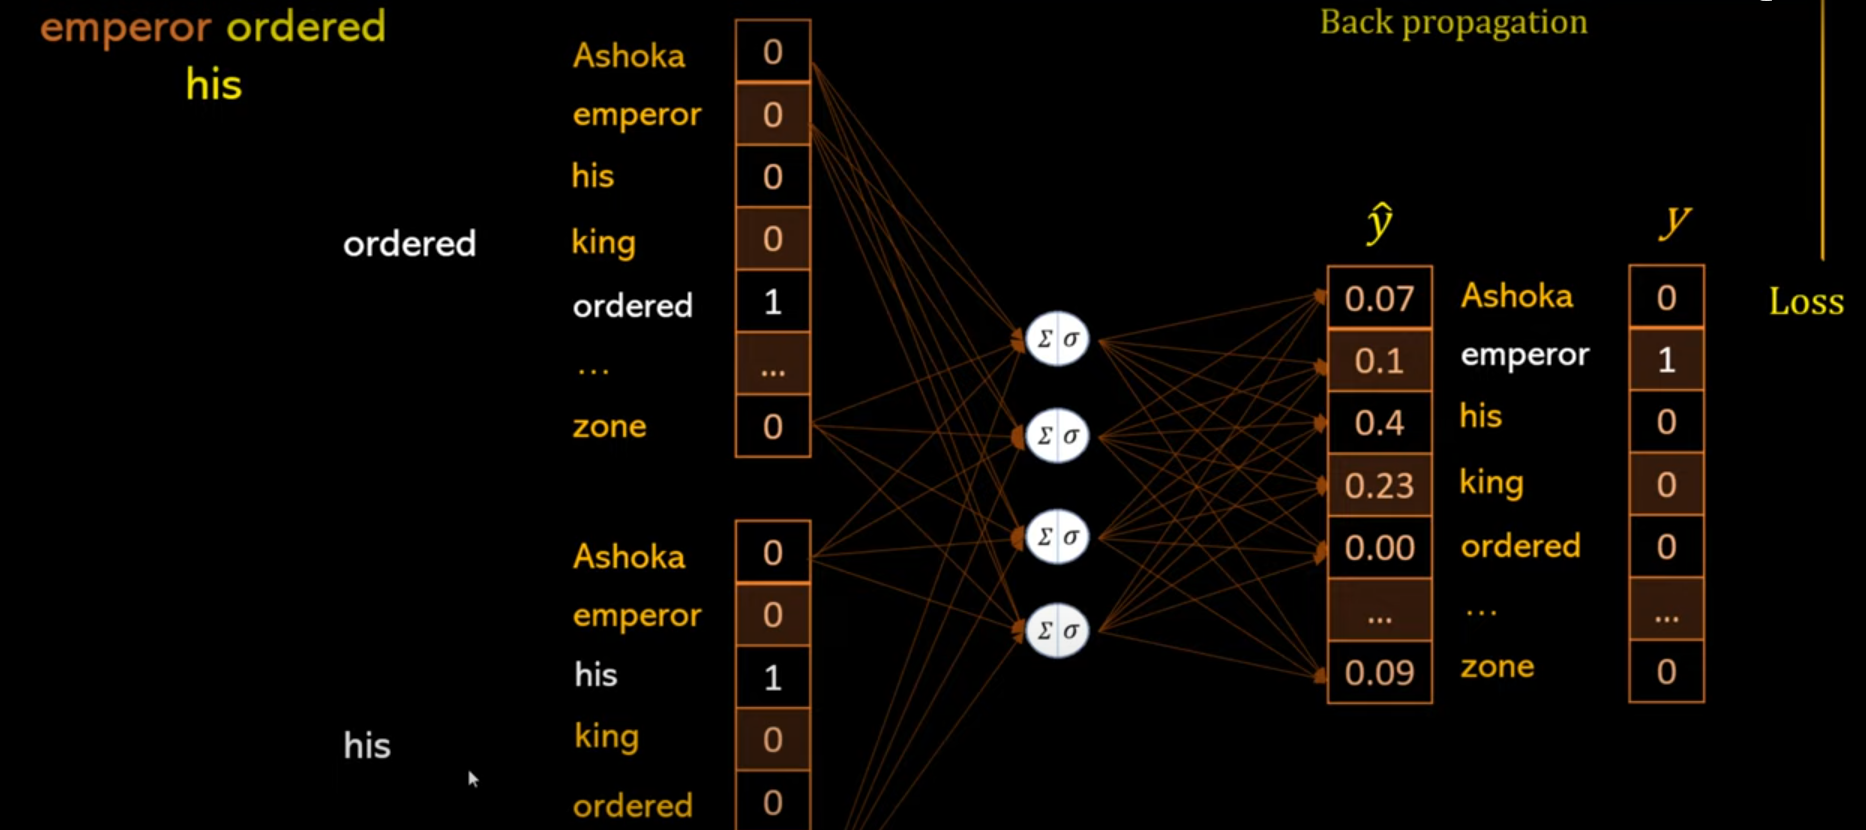

### Loading a pre trained google news word2Vec

In [3]:
import gensim.downloader as api

model = api.load("fasttext-wiki-news-subwords-300")

In [4]:
print(model["king"])

[-1.2063e-01  5.1695e-03 -1.2447e-02 -7.8528e-03 -2.3738e-02 -8.2595e-02
  4.5790e-02 -1.5382e-01  6.4550e-02  1.2893e-01  2.7643e-02  1.5958e-02
  7.7559e-02  6.0516e-02  1.2737e-01  8.4766e-02  6.3890e-02 -1.7687e-01
  4.3017e-02 -1.8031e-02 -3.3041e-02  2.1930e-02 -1.1328e-02  6.6453e-02
  1.5826e-01 -2.3008e-02 -4.3616e-03 -2.2379e-02  4.4891e-02  3.0103e-03
 -1.5565e-02 -7.6785e-02 -9.2186e-02  5.7907e-02 -2.7658e-02  5.4500e-03
  1.8975e-02  4.2939e-02  3.4704e-03  4.0449e-02 -4.0245e-03 -1.1594e-01
 -5.8337e-03  3.2509e-02 -8.6535e-02  7.2000e-02 -2.2299e-02  1.3079e-02
 -3.9515e-02  6.8996e-02  9.2300e-02 -7.5371e-02  5.9412e-03 -3.4945e-02
 -3.3417e-02 -9.9982e-02  1.6438e-02  6.3739e-02 -6.2391e-02  7.8285e-04
 -2.9210e-02 -9.6416e-02  7.2910e-02  4.5905e-02 -8.3387e-02  7.1969e-02
  4.0932e-02 -5.6454e-03  1.3709e-01 -1.1793e-01 -7.1011e-02 -7.1963e-02
  6.5600e-02 -4.6315e-02 -1.7200e-02  3.4434e-02  4.4218e-02 -9.6354e-03
 -6.8105e-02  3.0810e-02  1.5424e-02  5.6398e-02  4

In [5]:
model.most_similar("king")

[('king-', 0.7838029861450195),
 ('boy-king', 0.7704817652702332),
 ('queen', 0.7704246640205383),
 ('prince', 0.7700967192649841),
 ('kings', 0.7668929696083069),
 ('sub-king', 0.7391484379768372),
 ('monarch', 0.736833393573761),
 ('king-making', 0.7288671731948853),
 ('ex-king', 0.7280160188674927),
 ('warrior-king', 0.7232080698013306)]

In [6]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7786749005317688),
 ('queen-mother', 0.7143871784210205),
 ('king-', 0.6981282234191895),
 ('queen-consort', 0.6724597811698914),
 ('monarch', 0.6666999459266663),
 ('child-king', 0.6663159132003784),
 ('boy-king', 0.660534679889679),
 ('princess', 0.653827428817749),
 ('ex-queen', 0.652145504951477),
 ('kings', 0.6497675180435181)]

In [7]:
model.doesnt_match(["apple", "banana", "car", "mango"])

'car'

### **Training Own model**

In [8]:
sentences = [
    ["machine", "learning", "is", "amazing"],
    ["deep", "learning", "is", "a", "subset", "of", "machine", "learning"],
    ["artificial", "intelligence", "is", "the", "future"],
    ["word2vec", "converts", "words", "into", "vectors"]
]



In [9]:
from gensim.models import Word2Vec
model2 = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

In [10]:
model2.wv["machine"]

array([-0.01723938,  0.00733148,  0.01037977,  0.01148388,  0.01493384,
       -0.01233535,  0.00221123,  0.01209456, -0.0056801 , -0.01234705,
       -0.00082045, -0.0167379 , -0.01120002,  0.01420908,  0.00670508,
        0.01445134,  0.01360049,  0.01506148, -0.00757831, -0.00112361,
        0.00469675, -0.00903806,  0.01677746, -0.01971633,  0.01352928,
        0.00582883, -0.00986566,  0.00879638, -0.00347915,  0.01342277,
        0.0199297 , -0.00872489, -0.00119868, -0.01139127,  0.00770164,
        0.00557325,  0.01378215,  0.01220219,  0.01907699,  0.01854683,
        0.01579614, -0.01397901, -0.01831173, -0.00071151, -0.00619968,
        0.01578863,  0.01187715, -0.00309133,  0.00302193,  0.00358008],
      dtype=float32)

In [11]:
model2.wv.most_similar("learning")

[('converts', 0.21067024767398834),
 ('the', 0.16703546047210693),
 ('word2vec', 0.15045210719108582),
 ('subset', 0.13204392790794373),
 ('machine', 0.1267007291316986),
 ('into', 0.0999353677034378),
 ('artificial', 0.05936763808131218),
 ('is', 0.04243569076061249),
 ('future', 0.0406772643327713),
 ('deep', 0.012497726827859879)]

In [12]:
from scipy.spatial.distance import cosine
from numpy.linalg import norm

In [13]:
# Distance
norm(model["man"] - model["woman"])

0.6913657

In [14]:
# Cosine Similarity
cosine(model["kingdom"], model["people"])

0.5992496782686327